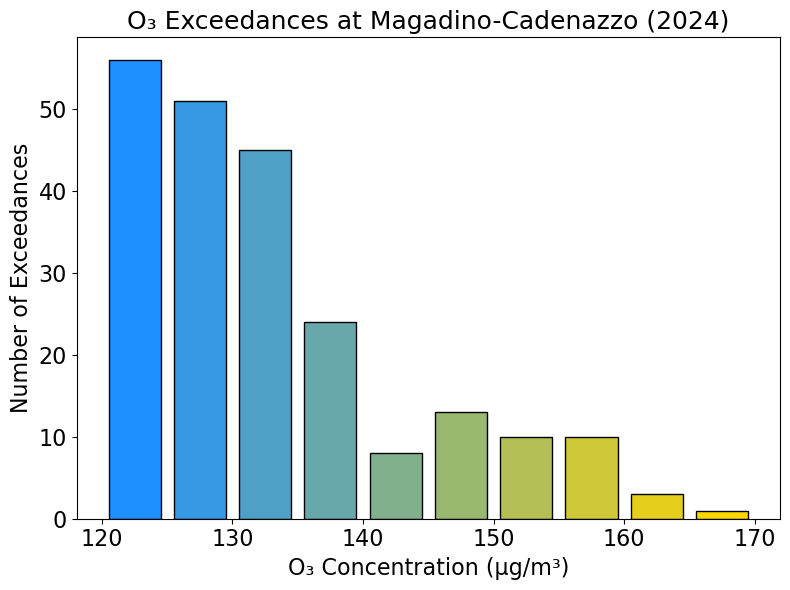

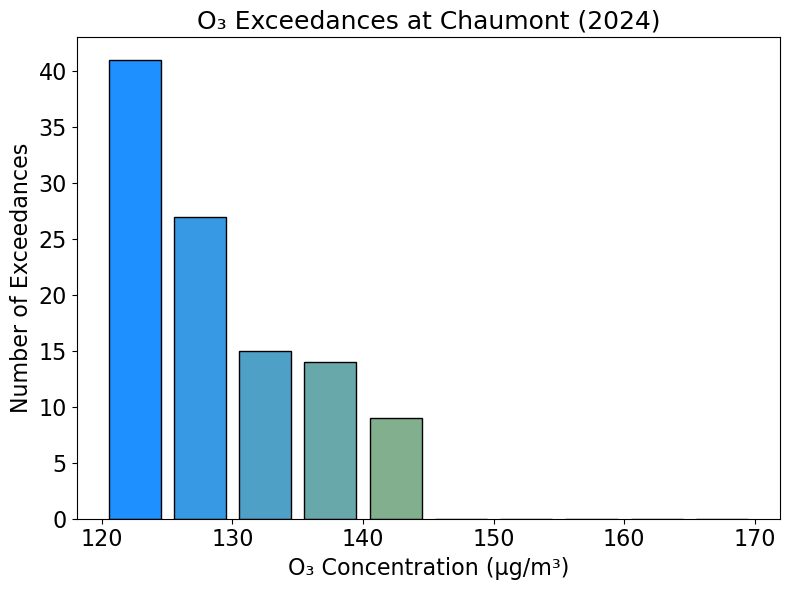

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the data
file_path = 'O3.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, delimiter=',')  # Adjust delimiter if necessary

# Convert 'Date/heure' to datetime format
df['Date/heure'] = pd.to_datetime(df['Date/heure'], format='%d.%m.%Y %H:%M')

# Define the legal threshold
threshold = 120

# Filter exceedances for both stations
df_exceedances = df[(df['Magadino-Cadenazzo'] > threshold) | (df['Chaumont'] > threshold)]

# Determine the maximum concentration observed across both stations
max_concentration = df_exceedances[['Magadino-Cadenazzo', 'Chaumont']].max().max()

# Define bin edges: from 120 to the next multiple of 5 above the max concentration
bin_edges = np.arange(threshold, np.ceil(max_concentration / 5) * 5 + 5, 5)

# Define a custom colormap from intense blue to vivid yellow
cmap = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["dodgerblue", "gold"])

# Function to plot histogram with color gradient and spaced bars
def plot_histogram(ax, data, station_name):
    n, bins, patches = ax.hist(data, bins=bin_edges, edgecolor='black', rwidth=0.8)
    ax.set_title(f'O₃ Exceedances at {station_name} (2024)', fontsize=18)
    ax.set_xlabel('O₃ Concentration (µg/m³)', fontsize=16)
    ax.set_ylabel('Number of Exceedances', fontsize=16)

    # Update tick font sizes
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Normalize bin indices to [0, 1] for colormap
    bin_norm = mcolors.Normalize(vmin=0, vmax=len(bin_edges) - 2)
    for i, patch in enumerate(patches):
        color = cmap(bin_norm(i))
        patch.set_facecolor(color)

# Create separate figures for each station
for station in ['Magadino-Cadenazzo', 'Chaumont']:
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_histogram(ax, df_exceedances[station].dropna(), station)
    plt.tight_layout()
    plt.show()

In [8]:
import pandas as pd

# Load the data
file_path = 'O3.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, delimiter=',')  # Adjust delimiter if necessary

# Convert 'Date/heure' to datetime format
df['Date/heure'] = pd.to_datetime(df['Date/heure'], format='%d.%m.%Y %H:%M')

# Define the legal threshold and the upper limit for the range
threshold = 120
upper_limit = 140

# Function to calculate the percentage of exceedances within the specified range
def calculate_percentage_in_range(data, station_name):
    # Total number of exceedances above the threshold
    total_exceedances = (data > threshold).sum()
    
    # Number of exceedances within the specified range
    in_range_exceedances = ((data > threshold) & (data <= upper_limit)).sum()
    
    # Calculate the percentage
    percentage_in_range = (in_range_exceedances / total_exceedances) * 100 if total_exceedances > 0 else 0
    
    # Display the results
    print(f"At {station_name}:")
    print(f"  - {percentage_in_range:.2f}% of exceedances are between {threshold} and {upper_limit} µg/m³.")
    max_value = data.max()
    print(f"  - The maximum O₃ concentration is {max_value:.2f} µg/m³.\n")

# Calculate and print the percentages and maximum values for each station
for station in ['Magadino-Cadenazzo', 'Chaumont']:
    calculate_percentage_in_range(df[station].dropna(), station)

At Magadino-Cadenazzo:
  - 79.64% of exceedances are between 120 and 140 µg/m³.
  - The maximum O₃ concentration is 165.40 µg/m³.

At Chaumont:
  - 91.51% of exceedances are between 120 and 140 µg/m³.
  - The maximum O₃ concentration is 144.40 µg/m³.



In [9]:
import pandas as pd

# Load the data
file_path = 'O3.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, delimiter=',')  # Adjust delimiter if necessary

# Convert 'Date/heure' to datetime format
df['Date/heure'] = pd.to_datetime(df['Date/heure'], format='%d.%m.%Y %H:%M')

# Set 'Date/heure' as the index
df.set_index('Date/heure', inplace=True)

# Define the legal threshold
threshold = 100

# Function to calculate the number of 8-hour periods exceeding the threshold
def count_exceedances(data, station_name):
    # Resample the data to 8-hour periods and calculate the mean
    resampled_data = data.resample('8H').mean()
    
    # Count the number of periods exceeding the threshold
    exceedances = (resampled_data > threshold).sum()
    
    print(f"At {station_name}:")
    print(f"  - Number of 8-hour periods exceeding {threshold} µg/m³: {exceedances}")

# Calculate and print the exceedances for each station
for station in ['Magadino-Cadenazzo', 'Chaumont']:
    count_exceedances(df[station].dropna(), station)

At Magadino-Cadenazzo:
  - Number of 8-hour periods exceeding 100 µg/m³: 43
At Chaumont:
  - Number of 8-hour periods exceeding 100 µg/m³: 102


C:\Users\yocan\AppData\Local\Temp\ipykernel_375368\62605933.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = data.resample('8H').mean()
